#  **Final Project**  - ***Air Quality Forecasting***  Final Project
 Group - CS-2312

# **Problem Selection** - Clear, relevant, and justified dataset
# (we took the dataset in the .csv file from the site - https://data.mendeley.com/datasets/gjvrn32zbm/1)

In [ ]:
from google.colab import files
import pandas as pd
import io
#загружаем  и импортируем наш DataSet
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = uploaded[filename]

# преобразуем байтовые строки в DataFrame тип для вывода
df = pd.read_csv(io.BytesIO(data))

# Выводим первые и последние 5 строк базы данных в виде таблицы
df.head()
display(df)

Saving Air Quality Forecasting.csv to Air Quality Forecasting.csv


,Timestamp,PM2.5 [ug/m3],PM10[ug/m3],Ozone [ppb],Carbon_Monoxide [ppb],Temperature [°C],Relative_Humidity [%]
0,31/01/2022 12:00:00,13.181818,14.181818,456.090909,371.909091,20.413636,28.798182
1,31/01/2022 13:00:00,16.333333,17.333333,78.833333,405.750000,22.851667,22.753333
2,31/01/2022 14:00:00,25.480000,26.893333,44.280000,407.946667,24.910667,19.626133
3,31/01/2022 15:00:00,26.701058,28.343915,39.462963,405.023810,25.443915,19.002831
4,31/01/2022 16:00:00,32.166667,34.166667,33.916667,399.416667,23.152500,22.096667
...,...,...,...,...,...,...,...
11258,30/05/2023 19:00:00,0.000000,1.000000,67.083333,446.500000,21.634167,39.070000
11259,30/05/2023 20:00:00,0.000000,1.000000,72.916667,428.750000,20.148333,53.072500
11260,30/05/2023 21:00:00,0.000000,1.000000,52.750000,419.083333,19.200000,56.608333
11261,30/05/2023 22:00:00,0.000000,1.000000,44.166667,399.250000,18.064167,58.275833



# **Data Preprocessing** - Real dataset used, cleaned, and processed correctly

In [ ]:
# так как в нашем датасете есть стобец "Timestamp", то мы его исключаем для того чтобы наш код искал среднее значени только числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce') # в данной строке мы преобразуем столбец "Timestamp" в формат даты, если где то указаны неверные значения

#2 шаг мы делаем проверку на пропущенные значени во всех столбцах
print(df.isnull().sum())
if df.isnull().any().any():
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) #затем задаем условие, в котором в пропущенные значения вставляются средние значения для этого мы используем (fillna), для полноты датасета

Timestamp                0
PM2.5 [ug/m3]            0
PM10[ug/m3]              0
Ozone [ppb]              0
Carbon_Monoxide [ppb]    0
Temperature [°C]         0
Relative_Humidity [%]    0
dtype: int64


<ipython-input-2-1180908cabb1>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce') # в данной строке мы преобразуем столбец "Timestamp" в формат даты, если где то указаны неверные значения


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Импортируем библиотеки

# 1 так как значения в этой таблице достаточно большие, они могет плохо повлиять на нашу модель и подсчет среднего значения. Поэтому мы сокращаем.
pm25_data = df['PM2.5 [ug/m3]']
q1 = np.percentile(pm25_data, 25) # выставляем минимальные значения
q3 = np.percentile(pm25_data, 75) # и максимальные
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr # код будет автоматически высчитывать все подходящие нам значения
upper_limit = q3 + 1.5 * iqr
df['PM2.5 [ug/m3]'] = np.clip(pm25_data, lower_limit, upper_limit) # используем np.clip для замены значений которые превосходят в разы нужные нам, поэтому оно подставляет груничающие значения

# выше была указана обширная версия преобразования, для 1 колоны так можно сделать с каждой. Но так же все эти колоны можно преобразовать одним кодом
#делаем то же самое и для остальных чтобы не было проблем с будущей моделькой

numeric_cols = ['PM10[ug/m3]', 'Ozone [ppb]', 'Temperature [°C]', 'Relative_Humidity [%]']

for col in numeric_cols:

    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_limit, upper_limit)


# Масштабирование признаков это важная часть для создания модельки, потому что они зачастую чуствительные
# В этом коде мы используем этот метод чтобы создать более ровные условия, для того чтобы наша машина хорошо обучалась
scaler = MinMaxScaler()  # "MinMaxScaler" — это  тип масштабирования признаков, который преобразует признаки в заданный диапазон, обычно от 0 до 1.
numeric_cols = ['PM2.5 [ug/m3]', 'PM10[ug/m3]', 'Ozone [ppb]', 'Temperature [°C]', 'Relative_Humidity [%]']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# В этой части мы берем готовый месяц и день из колоны 'Timestamp' и создаем отдельные колоны в которых отображаются данные
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

# прогнозируем количество угарного газа  Carbon_Monoxide [ppb]
X = df[['PM2.5 [ug/m3]', 'PM10[ug/m3]', 'Ozone [ppb]', 'DayOfWeek', 'Month']]
y = df['Carbon_Monoxide [ppb]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(df)

,Timestamp,PM2.5 [ug/m3],PM10[ug/m3],Ozone [ppb],Carbon_Monoxide [ppb],Temperature [°C],Relative_Humidity [%],DayOfWeek,Month
0,2022-01-31 12:00:00,0.210488,0.203711,1.000000,371.909091,0.572734,0.263175,0,1
1,2022-01-31 13:00:00,0.260812,0.252415,0.857964,405.750000,0.666395,0.200532,0,1
2,2022-01-31 14:00:00,0.406866,0.400155,0.381093,407.946667,0.745494,0.168125,0,1
3,2022-01-31 15:00:00,0.426364,0.422572,0.314612,405.023810,0.765979,0.161666,0,1
4,2022-01-31 16:00:00,0.513639,0.512556,0.238068,399.416667,0.677951,0.193727,0,1
...,...,...,...,...,...,...,...,...,...
11258,2023-05-30 19:00:00,0.000000,0.000000,0.695802,446.500000,0.619623,0.369621,1,5
11259,2023-05-30 20:00:00,0.000000,0.000000,0.776308,428.750000,0.562543,0.514728,1,5
11260,2023-05-30 21:00:00,0.000000,0.000000,0.497987,419.083333,0.526111,0.551370,1,5
11261,2023-05-30 22:00:00,0.000000,0.000000,0.379528,399.250000,0.482477,0.568650,1,5


# **Feature Selection/EDA** - Justification of the selected features, Exploratory Data Analysis

>
Full explanation of the above code.

1. Import libraries - required for further work with the operations and functions that we will call in the code

2. 'PM2.5 [ug/m3]', 'PM10[ug/m3]', 'Ozone [ppb]', 'DayOfWeek', and 'Month'. - we chose these values ​​because they are the main indicators of air pollution. We format them for our model because these indicators are important for further creation of the variable "Carbon_Monoxide [ppb]". This variable predicts the release of carbon monoxide, which directly affects human health.
"DayofWeek" - since air quality changes daily due to various factors, we need this column to display weekly changes (i.e. pollution on weekends and weekdays can differ greatly)
"Month" - also displays statistics on air changes during the month, since the weather is different every day.



# We created a diagram that visually shows us whether real changes have occurred after our changes.

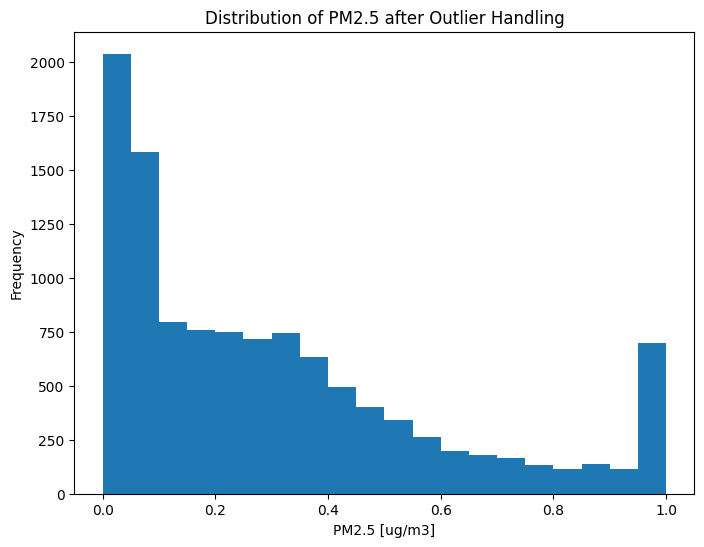

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # задаем значения для нашей диаграммы
plt.hist(df['PM2.5 [ug/m3]'], bins=20)  # выставляем лимит в 20 строк из таблицы датасета
plt.title('Distribution of PM2.5 after Outlier Handling')
plt.xlabel('PM2.5 [ug/m3]')
plt.ylabel('Frequency')
plt.show()

#In the second chart we use the seaborn library to create a statistical graph.Here we can see if there are any weekly changes, thanks to the graph we can see the changes every day during the week.

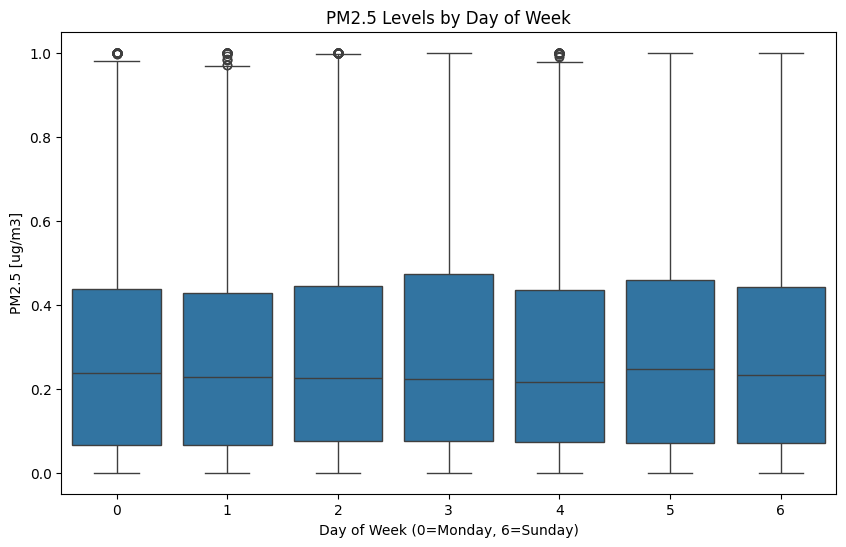

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='PM2.5 [ug/m3]', data=df)
plt.title('PM2.5 Levels by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('PM2.5 [ug/m3]')
plt.show()

# This chart plots data from two columns PM2.5 [ug/m3] and Carbon_Monoxide [ppb] to see if there is any relationship between the two columns.

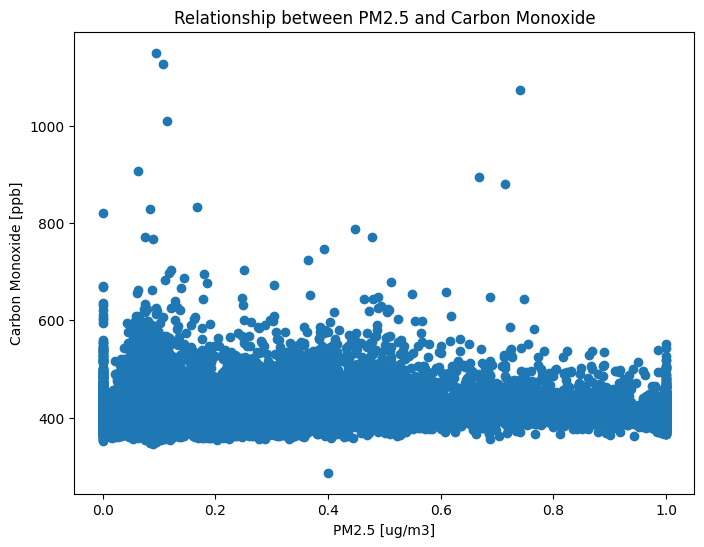

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PM2.5 [ug/m3]'], df['Carbon_Monoxide [ppb]'])
plt.title('Relationship between PM2.5 and Carbon Monoxide')
plt.xlabel('PM2.5 [ug/m3]')
plt.ylabel('Carbon Monoxide [ppb]')
plt.show()

**Linear Regression Model**
Key task of our model - building and comparing regression model to predict atmospheric carbon monoxide (CO) in parts per billion (ppb) from enviromental sensors and time features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #импорт модели линейной регрессии
from sklearn.metrics import mean_squared_error, r2_score
import joblib

#1. Мы выбираем цель (y) и функции (x)
features = [
    'Relative_Humidity [%]',
    'Ozone [ppb]',
    'PM2.5 [ug/m3]',
    'PM10[ug/m3]'
]
target = 'Carbon_Monoxide [ppb]'
X = df[features].values
y = df[target].values

# 2. Разделяем наш сет и тренируем его
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Тренируем Линейную регрессию
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Подставляем наши значения
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")
print(f"Test R²:  {r2:.3f}")

# 5. Сохраняем нашу модель
joblib.dump(model, 'co_linear_regression_model.joblib')
print("Saved model to 'co_linear_regression_model.joblib'")

# 6. Выводим параметры нашей модели
print("Intercept:", model.intercept_)
for feat, coef in zip(features, model.coef_):
    print(f"Coefficient for {feat}: {coef:.6f}")

Test MSE: 3803.671
Test R²:  -0.910
Saved model to 'co_linear_regression_model.joblib'
Intercept: 398.0721818957078
Coefficient for Relative_Humidity [%]: 0.323804
Coefficient for Ozone [ppb]: 0.237955
Coefficient for PM2.5 [ug/m3]: -0.000011
Coefficient for PM10[ug/m3]: 0.072386


# We can see that Test R²:  -0.910. Which means linear model is fitting worse than horizontal line at the mean. Therefore, we need use other methods for accurate date.

1. Implementing data cleaning & preprocessing. It allows to handle missing or extreme values. It will check for NaNs or outliers.
2. Feature engineering. We need to reintroduce temperature and add time features, so our timestamp could yield hour-of-day, day-of-week or seasonal trends.
3. Experimenting regularized regression. A simple Linear Regression may over or underfit badly, so we could use Ridge with cross validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month

features = [
    'Relative_Humidity [%]',
    'Ozone [ppb]',
    'PM2.5 [ug/m3]',
    'PM10[ug/m3]',
    'Temperature [°C]',
    'hour',
    'dayofweek',
    'month'
]
target = 'Carbon_Monoxide [ppb]'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('reg', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5))
])
ridge_pipeline.fit(X_train, y_train)
y_ridge = ridge_pipeline.predict(X_test)
print(f"RidgeCV Test MSE: {mean_squared_error(y_test, y_ridge):.3f}")
print(f"RidgeCV Test R²:  {r2_score(y_test, y_ridge):.3f}")
joblib.dump(ridge_pipeline, 'co_ridge_pipeline.joblib')

ridge = ridge_pipeline.named_steps['reg']
print(f"Intercept: {ridge.intercept_}")
for feat, coef in zip(features, ridge.coef_):
    print(f"{feat}: {coef:.6f}")

rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_rf = rf_pipeline.predict(X_test)
print(f"RandomForest Test MSE: {mean_squared_error(y_test, y_rf):.3f}")
print(f"RandomForest Test R²:  {r2_score(y_test, y_rf):.3f}")
joblib.dump(rf_pipeline, 'co_rf_model.joblib')


<ipython-input-4-8a0f47055ea4>:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


RidgeCV Test MSE: 2171.505
RidgeCV Test R²:  -0.090
Saved RidgeCV pipeline to 'co_ridge_pipeline.joblib'

Linear model formula:
  y = 425.688578 + (-1.854079 * Relative_Humidity [%]) + (8.360843 * Ozone [ppb]) + (-7.276833 * PM2.5 [ug/m3]) + (6.863015 * PM10[ug/m3]) + (-10.260157 * Temperature [°C]) + (-0.207038 * hour) + (-1.009120 * dayofweek) + (6.262635 * month)

RandomForest Test MSE: 1151.482
RandomForest Test R²:  0.422
Saved RandomForest model to 'co_rf_model.joblib'


Explanation of code:
1.

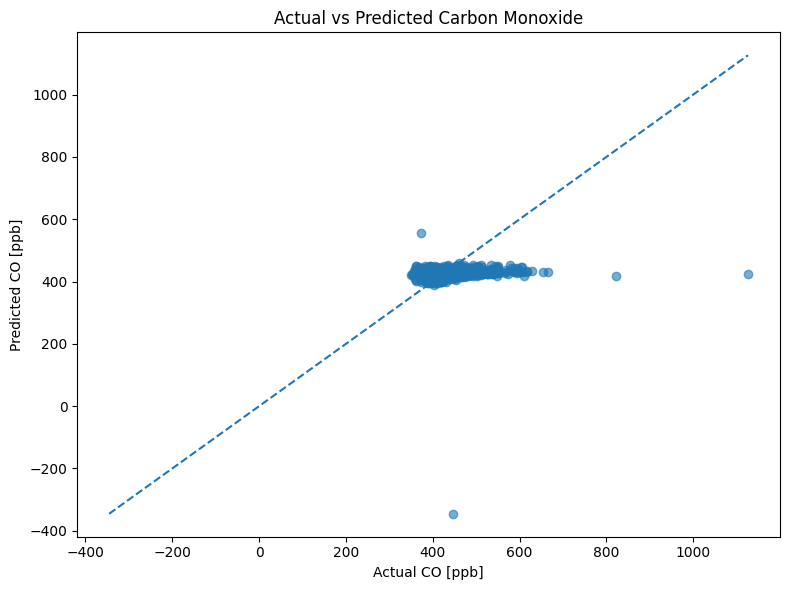

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Actual CO [ppb]')
plt.ylabel('Predicted CO [ppb]')
plt.title('Actual vs Predicted Carbon Monoxide')
plt.tight_layout()
plt.show()